In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [60]:
data = pd.read_csv(r"PJME_hourly.csv")

### Explore Data

In [61]:
data.sample(5)

,Datetime,PJME_MW
108276,2014-08-24 13:00:00,31370.0
92511,2012-06-11 14:00:00,43692.0
47974,2007-07-11 10:00:00,44463.0
36320,2006-11-09 17:00:00,32166.0
41188,2006-04-20 14:00:00,33016.0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [63]:
data.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [64]:
data = data.set_index('Datetime')

<Axes: title={'center': 'energy using mgw'}, xlabel='Datetime'>

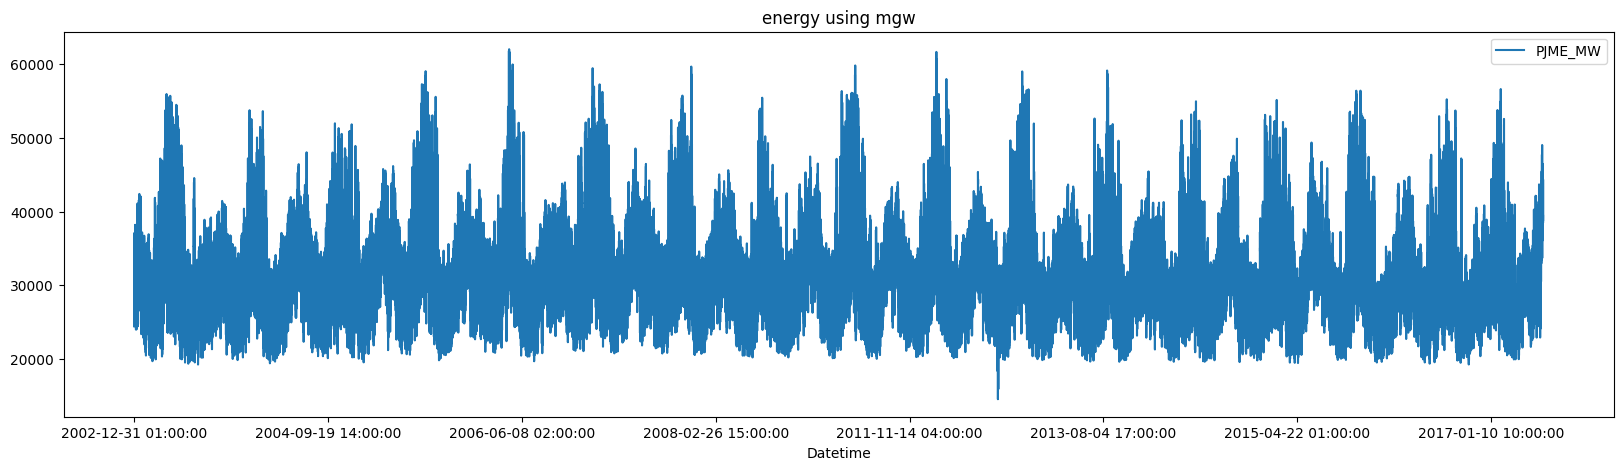

In [65]:
data.plot(figsize=(20,5),title='energy using mgw')

In [66]:
data.index = pd.to_datetime(data.index)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


<Axes: title={'center': 'energy using mgw'}, xlabel='Datetime'>

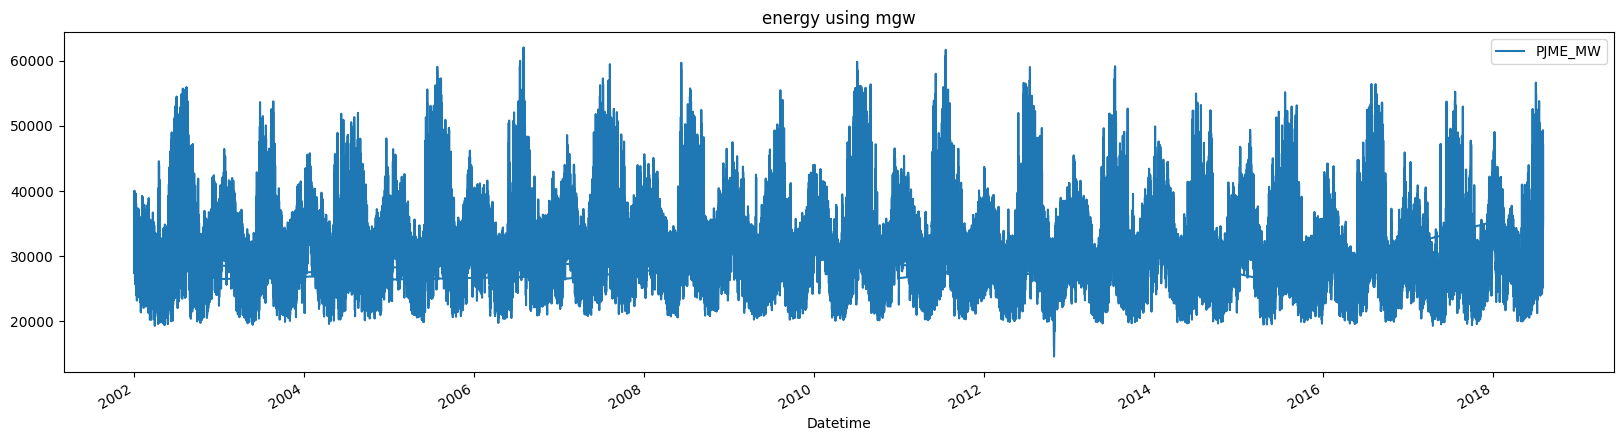

In [68]:
data.plot(figsize=(20, 5), title="energy using mgw")

### Transform Data

In [69]:
data['hour'] = data.index.hour
data["dayofweek"] = data.index.dayofweek
data['month'] = data.index.month
data["quarter"] = data.index.quarter
data["year"] = data.index.year
data["dayofyear"] = data.index.dayofyear


In [70]:
data.sample(5)

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,,
2009-07-23 12:00:00,40955.0,12,3,7,3,2009,204
2007-01-24 21:00:00,39091.0,21,2,1,1,2007,24
2016-06-11 14:00:00,34349.0,14,5,6,2,2016,163
2008-01-04 11:00:00,40506.0,11,4,1,1,2008,4
2003-11-16 04:00:00,23068.0,4,6,11,4,2003,320


Text(0.5, 1.0, 'Energy usage by hour')

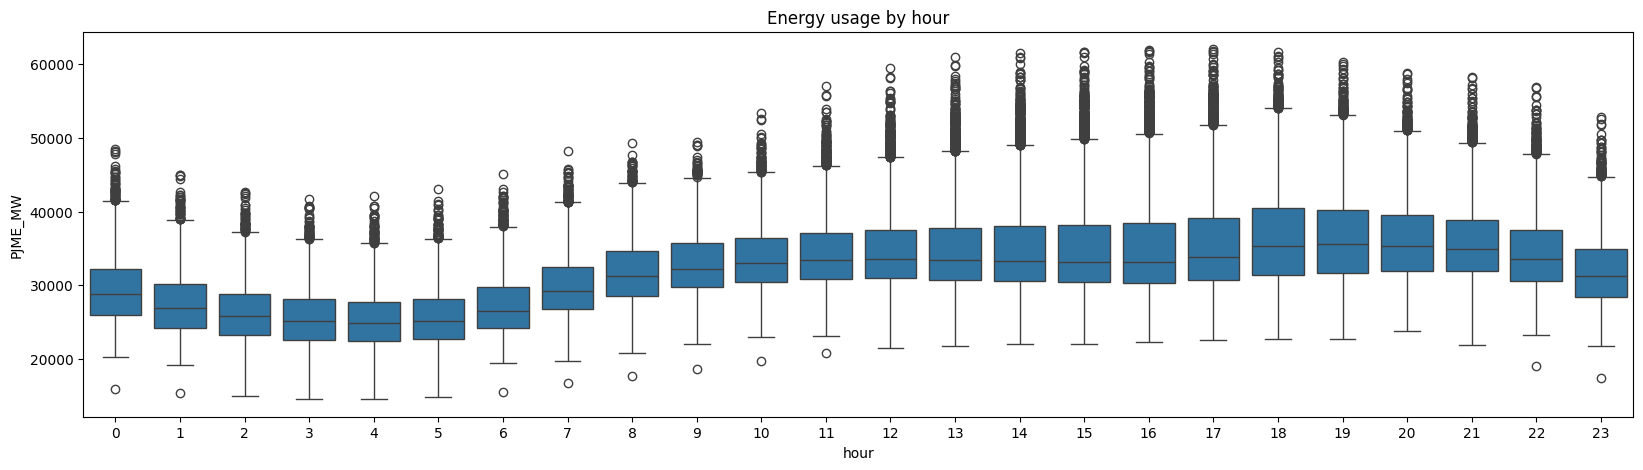

In [71]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=data,x='hour',y='PJME_MW')
plt.title('Energy usage by hour')

Text(0.5, 1.0, 'Energy usage by month')

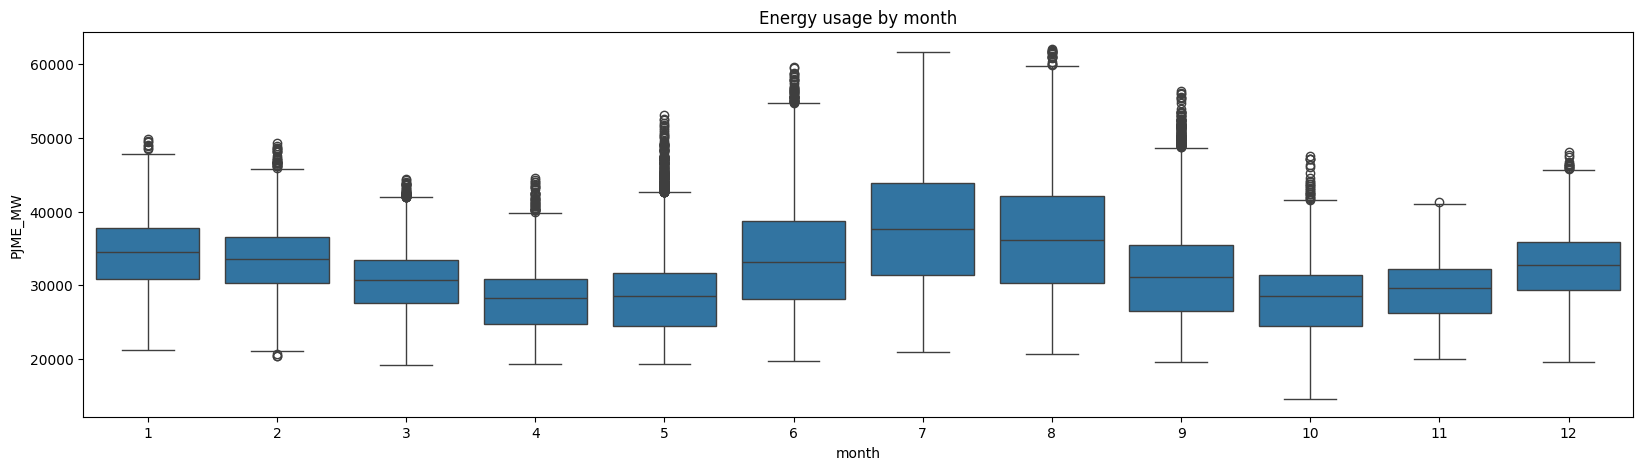

In [72]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, x="month", y="PJME_MW")
plt.title("Energy usage by month")

Text(0.5, 1.0, 'Energy usage by year')

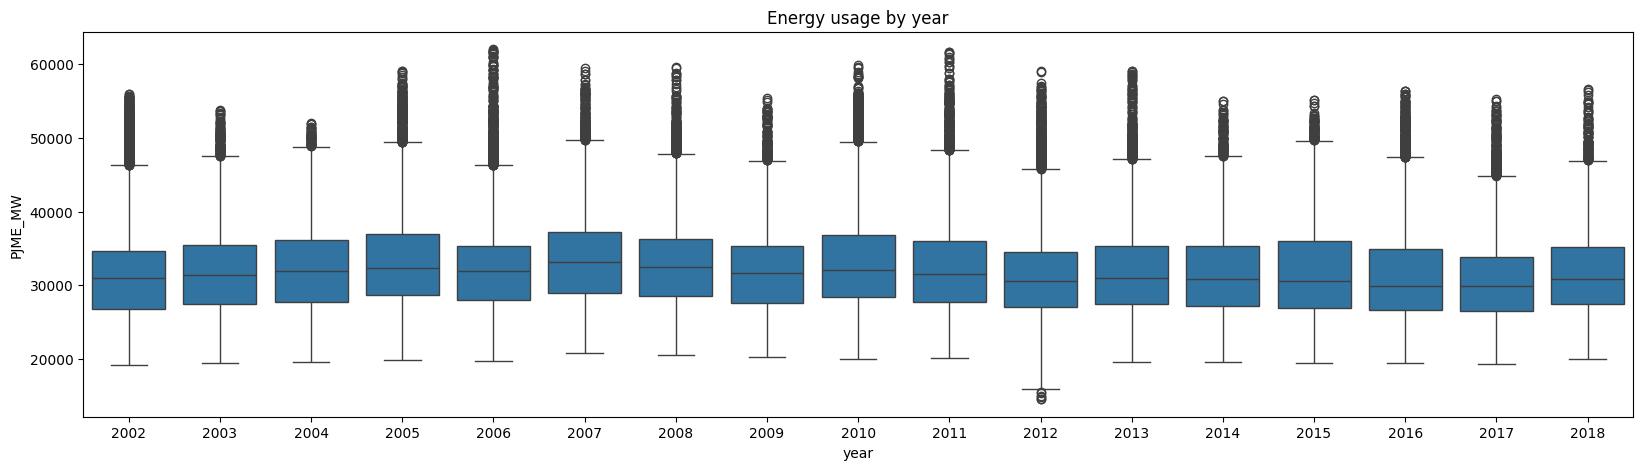

In [73]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, x="year", y="PJME_MW")
plt.title("Energy usage by year")


Text(0.5, 1.0, 'Energy usage by quarter')

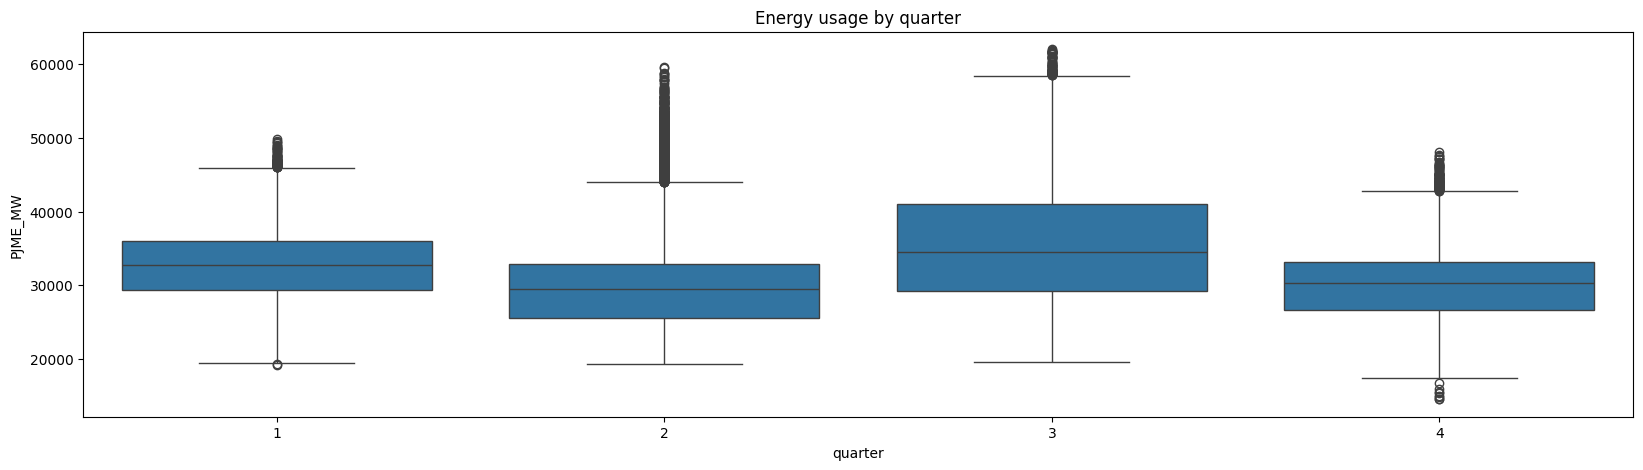

In [74]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, x="quarter", y="PJME_MW")
plt.title("Energy usage by quarter")

Text(0.5, 1.0, 'Energy usage by day of week')

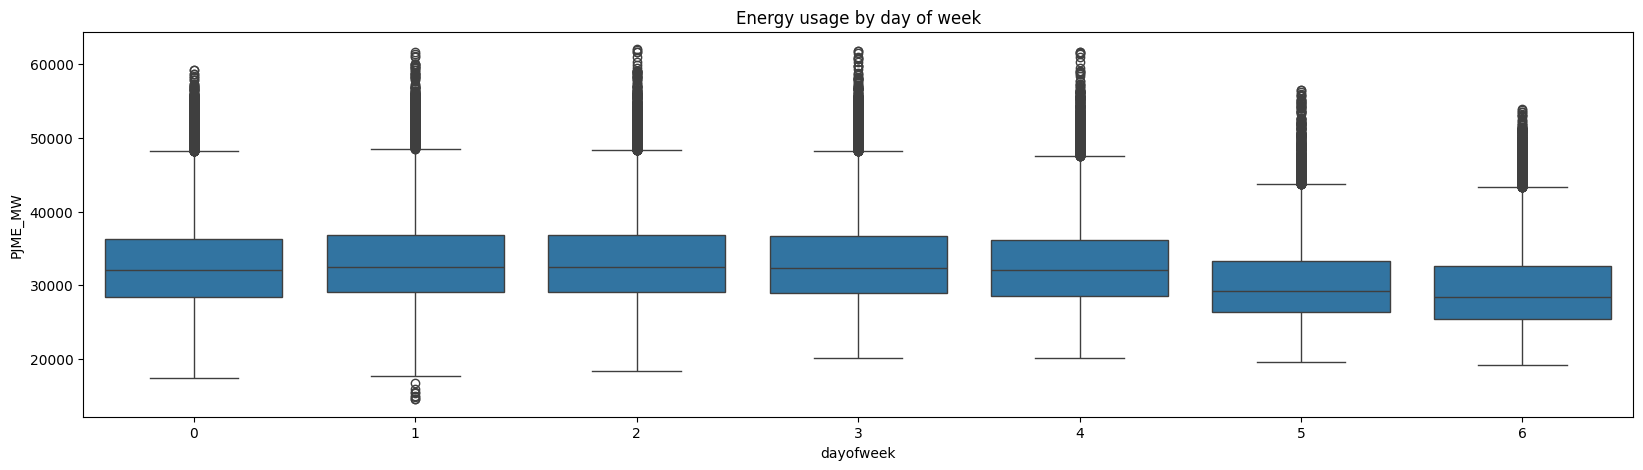

In [75]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, x="dayofweek", y="PJME_MW")
plt.title("Energy usage by day of week")

Text(0.5, 1.0, 'Energy usage by day of year')

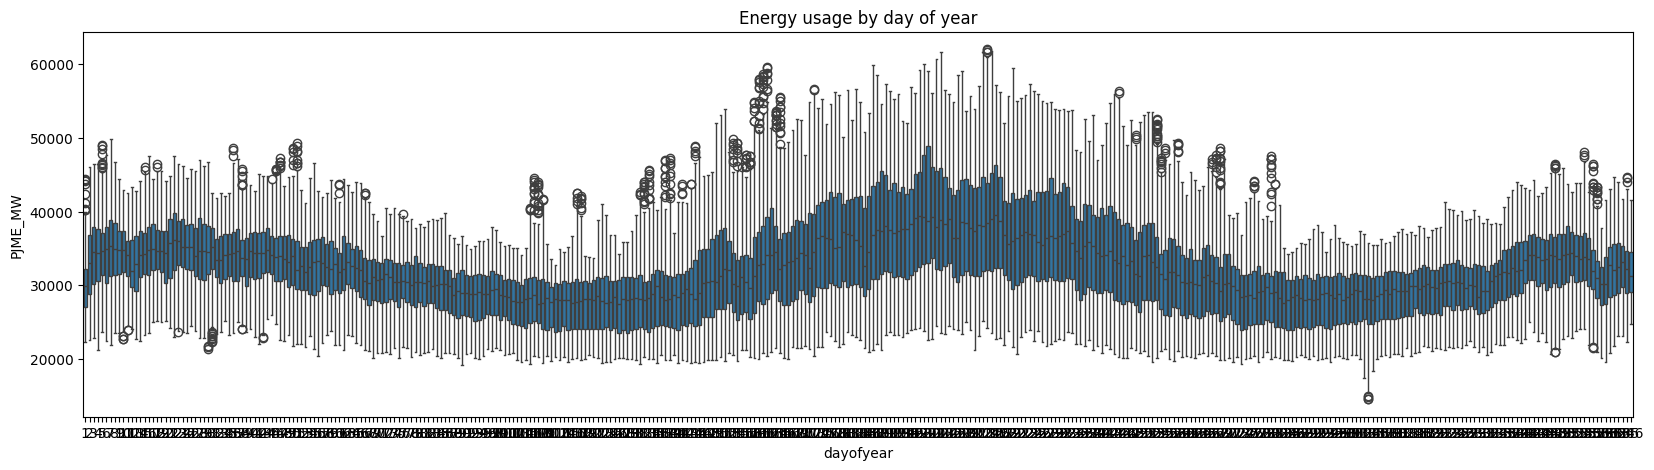

In [76]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, x="dayofyear", y="PJME_MW")
plt.title("Energy usage by day of year")


### ML Model

In [77]:
x = data.drop('PJME_MW',axis = 1)
y = data['PJME_MW'] 

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [79]:
model = KNeighborsClassifier()

In [80]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [81]:
pred = model.predict(x_test)

In [82]:
mean_squared_error(pred, y_test)

16043615.033431932